In [1]:
def get_unique_values(keys, target_key, datatype = float):
    unique_c_values = set()  # ユニークな値を保存するためのset

    for key in keys:
        if not (target_key + "=") in key:
            continue
        key_value_pairs = key.split(", ")  # キーと値のペアに分割
        for pair in key_value_pairs:
            k, v = pair.split("=")  # キーと値に分割
            if k == target_key:
                unique_c_values.add(datatype(v))  # floatとして保存（文字列として保存する場合はこの変換は不要）

    unique_c_values_list = sorted(list(unique_c_values))  # ソートしてリストに変換

    return unique_c_values_list

def get_param_value(filename, target_key, value_type = float):
    unique_c_values = set()  # ユニークな値を保存するためのset

    l = filename.split("_")  # キーと値のペアに分割
    
    tmp = l[l.index(target_key) + 1]
    if ".json" in tmp:
        val = value_type(tmp[:-5])
    else:
        val = value_type(tmp)

    return val

## success rate plot
we want to see exponential improvement with c, and J?

## J scaling for pauli

In [140]:
import json, glob
gate_type = "haar"
error_type = "pauli"

#n_data = 10000
n_data = 2000
eps = 1e-4
load_each_J = True
load_each_c = True

assert load_each_J and load_each_c, "both required here"

sname = f"results/success_rate/success_rate_{gate_type}_{error_type}_ndata_*_eps_{eps:.2e}*.json"
fname_list = glob.glob(sname)
#print(fname_list)
ndata_candidates = [get_param_value(_f, "ndata", int) for _f in fname_list]
print("\ncandidates for ndata:")
print(sorted(set(list(ndata_candidates))))
print(f"your choice: {n_data}")

sname = f"results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_*.json"
fname_list = [f for f in glob.glob(sname) if "_c_" in f]
c_list = sorted(list(set([get_param_value(_f, "c", float) for _f in fname_list])))
print(f"{c_list=}")
data = {}
for c in c_list:
    files = [f for f in glob.glob(sname) if f"_c_{c}" in f and f"_J_" in f]
    J_list = [get_param_value(_f, "J", int) for _f in files]
    #print("\ncandidates for ndata:")
    #key = f"c={c}"
    for J, filename in zip(J_list, files):
        key = f"c={c}, {J=}"
        data[key] = json.load(open(filename, "r"))
    
        nondiag_l1_data = data[key]["nondiag_l1_data"]
        #c_list = get_unique_values(nondiag_l1_data.keys(), "c")



candidates for ndata:
[3, 4, 10, 30, 40, 50, 100, 200, 300, 400, 1000, 2000, 10000]
your choice: 2000
c_list=[0.3, 0.6, 0.9, 1.0, 1.2, 1.5]


/tmp/ipykernel_44830/1011364060.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Reds")


tentative fig 2b


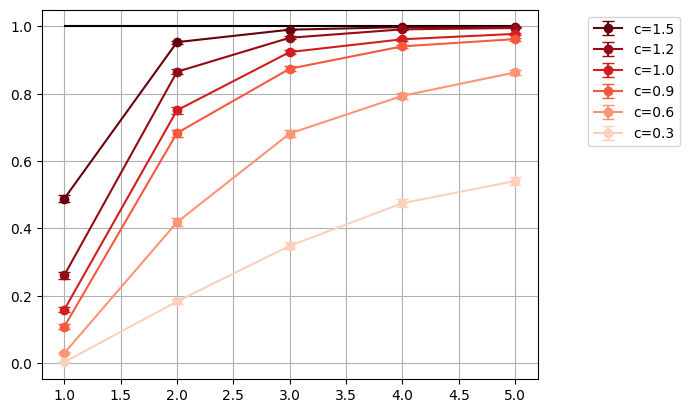

In [141]:
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 10
cmap = get_cmap("Reds")
#fig = plt.figure(figsize = (4, 4))

#c = 1.2
eps = 1e-4
threshold = 1e-12
J_list_disp = [5,4,3,2,1]

#c_list = [0.3, 0.5, 0.8, 1.0]
ymin = 1
for jj, c in enumerate(c_list[::-1]):
    #color = cmap(((jj+1)/len(c_list)))
    color = cmap((len(c_list) - jj)/(len(c_list)-0.5))
    success = []
    success_std = []
    
    for ii, J in enumerate(J_list_disp):
        mykey = f"c={c}, {J=}"
        key = f"eps={eps:.2e}, {J=}, c={c}"
        #data[key] = json.load(open(filename, "r"))
    
        try:
            nondiag_l1_data = data[mykey]["nondiag_l1_data"][key]
            arr = np.array(nondiag_l1_data) <= min([threshold, eps**2 * c])
            rate = np.mean(arr)
            std = np.std(arr) / np.sqrt(len(arr)-1)

            #print(rate)
            #if rate !=1:
            success.append(rate)
            success_std.append(std)     
        except Exception as e:
            print(e)
            success.append(np.NaN)
            success_std.append(np.NaN)     
        
        
    if ymin > 1 - max(success):
        ymin = 1 - max(success)

    #plt.plot(J_list_disp, 1- np.array(success), "-o", label = f"{c=}", color = color)
    plt.errorbar(J_list_disp, np.array(success),yerr = success_std,  label = f"{c=}", color = color, capsize = 4, marker = "o")
#plt.yscale("log")
plt.grid()
plt.legend(bbox_to_anchor=(1.3, 1))
plt.hlines(y = 1, xmin = 1, xmax = max(J_list_disp), color = "black")
#plt.ylim(ymin = ymin/2, ymax = 1.1)

figname = f"figures/plot_success_Jscaling_{gate_type}_{error_type}_ndata_{n_data}.pdf"
#plt.savefig(figname, bbox_inches = "tight")
#print(f"...saved as {figname}")

print("tentative fig 2b")

/tmp/ipykernel_44830/2704109629.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Reds")


...saved as figures/plot_success_Jscaling_haar_pauli_ndata_2000_log.pdf


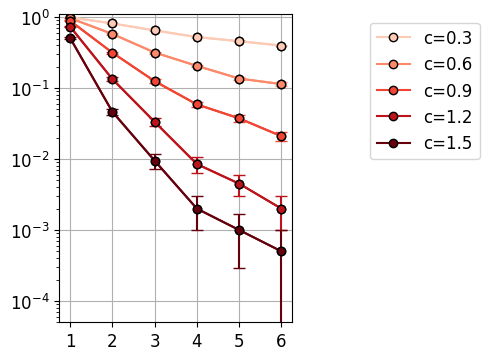

In [143]:
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 12
cmap = get_cmap("Reds")
fig = plt.figure(figsize = (3, 4))

#c = 1.2
eps = 1e-4
threshold = 1e-12
J_list_disp = [1, 2, 3, 4, 5, 6, ]

c_list = [0.3, 0.6, 0.9, 1.2, 1.5]
ymin = 1
for jj, c in enumerate(c_list):
    color = cmap(((jj+1)/len(c_list)))
    success = []
    success_std = []
    
    for ii, J in enumerate(J_list_disp):
        mykey = f"c={c}, {J=}"
        key = f"eps={eps:.2e}, {J=}, c={c}"
        #data[key] = json.load(open(filename, "r"))
    
        try:
            nondiag_l1_data = data[mykey]["nondiag_l1_data"][key]
            arr = np.array(nondiag_l1_data) <= min([threshold, eps**2 * c])
            rate = np.mean(arr)
            std = np.std(arr) / np.sqrt(len(arr)-1)

            #print(rate)
            #if rate !=1:
            success.append(rate)
            success_std.append(std)     
        except Exception as e:
            print(e)
            success.append(np.NaN)
            success_std.append(np.NaN)     
        
        
    if ymin > 1 - max(success):
        ymin = 1 - max(success)

    #plt.plot(J_list_disp, 1- np.array(success), "-o", label = f"{c=}", color = color)
    plt.errorbar(J_list_disp, 1- np.array(success),label = f"{c=}", color = color, marker = "o", markeredgecolor = "black")
    plt.errorbar(J_list_disp, 1- np.array(success),yerr = success_std,  color = color, capsize = 4, marker = "o", markeredgecolor = "black")
plt.yscale("log")
plt.grid()
plt.legend(bbox_to_anchor=(1.3, 1))
plt.ylim(ymin = 0.05e-3, ymax = 1.1)
plt.xticks(J_list_disp, J_list_disp)

figname = f"figures/plot_success_Jscaling_{gate_type}_{error_type}_ndata_{n_data}_log.pdf"
plt.savefig(figname, bbox_inches = "tight")
print(f"...saved as {figname}")

#print("tentative fig 2b")

## J scaling for depol

In [149]:
import json, glob
gate_type = "haar"
error_type = "depol"

#n_data = 10000
n_data = 2000
eps = 1e-4
load_each_J = True
load_each_c = True

assert load_each_J and load_each_c, "both required here"

sname = f"results/success_rate/success_rate_{gate_type}_{error_type}_ndata_*_eps_{eps:.2e}*.json"
fname_list = glob.glob(sname)
#print(fname_list)
ndata_candidates = [get_param_value(_f, "ndata", int) for _f in fname_list]
print("\ncandidates for ndata:")
print(sorted(set(list(ndata_candidates))))
print(f"your choice: {n_data}")

sname = f"results/success_rate/success_rate_{gate_type}_{error_type}_ndata_{n_data}_cfilled_eps_{eps:.2e}_J_*.json"
fname_list = [f for f in glob.glob(sname) if "_c_" in f]
c_list = sorted(list(set([get_param_value(_f, "c", float) for _f in fname_list])))
print(f"{c_list=}")
data = {}
for c in c_list:
    files = [f for f in glob.glob(sname) if f"_c_{c}" in f and f"_J_" in f]
    J_list = [get_param_value(_f, "J", int) for _f in files]
    #print("\ncandidates for ndata:")
    #key = f"c={c}"
    for J, filename in zip(J_list, files):
        key = f"c={c}, {J=}"
        data[key] = json.load(open(filename, "r"))
    
        nondiag_l1_data = data[key]["nondiag_l1_data"]
        #c_list = get_unique_values(nondiag_l1_data.keys(), "c")



candidates for ndata:
[50, 200, 2000, 10000]
your choice: 2000
c_list=[0.3, 0.6, 0.9, 1.0, 1.2, 1.5]


/tmp/ipykernel_44830/3934713182.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Reds")


tentative fig 2b


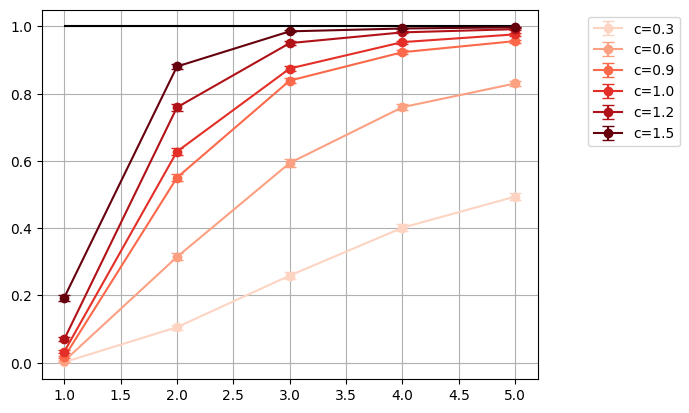

In [150]:
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 10
cmap = get_cmap("Reds")
#fig = plt.figure(figsize = (4, 4))

#c = 1.2
eps = 1e-4
threshold = 1e-12
J_list_disp = [1, 2, 3, 4, 5, ]

#c_list = [0.3, 0.5, 0.8, 1.0]
ymin = 1
for jj, c in enumerate(c_list):
    color = cmap(((jj+1)/len(c_list)))
    success = []
    success_std = []
    
    for ii, J in enumerate(J_list_disp):
        mykey = f"c={c}, {J=}"
        key = f"eps={eps:.2e}, {J=}, c={c}"
        #data[key] = json.load(open(filename, "r"))
    
        try:
            nondiag_l1_data = data[mykey]["nondiag_l1_data"][key]
            arr = np.array(nondiag_l1_data) <= min([threshold, eps**2 * c])
            rate = np.mean(arr)
            std = np.std(arr) / np.sqrt(len(arr)-1)

            #print(rate)
            #if rate !=1:
            success.append(rate)
            success_std.append(std)     
        except Exception as e:
            print(e)
            success.append(np.NaN)
            success_std.append(np.NaN)     
        
        
    if ymin > 1 - max(success):
        ymin = 1 - max(success)

    #plt.plot(J_list_disp, 1- np.array(success), "-o", label = f"{c=}", color = color)
    plt.errorbar(J_list_disp, np.array(success),yerr = success_std,  label = f"{c=}", color = color, capsize = 4, marker = "o")
#plt.yscale("log")
plt.grid()
plt.legend(bbox_to_anchor=(1.3, 1))
plt.hlines(y = 1, xmin = 1, xmax = max(J_list_disp), color = "black")
#plt.ylim(ymin = ymin/2, ymax = 1.1)

figname = f"figures/plot_success_Jscaling_{gate_type}_{error_type}_ndata_{n_data}.pdf"
#plt.savefig(figname, bbox_inches = "tight")
#print(f"...saved as {figname}")

print("tentative fig 2b")

/tmp/ipykernel_44830/427089677.py:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = get_cmap("Reds")


...saved as figures/plot_success_Jscaling_haar_depol_ndata_2000_log.pdf
tentative fig 2b


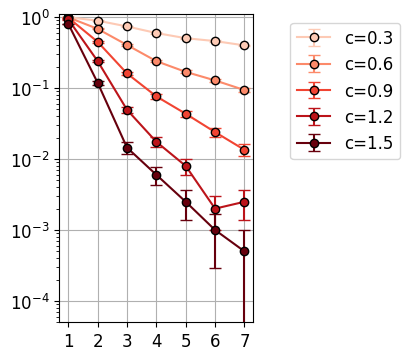

In [151]:
import numpy as np
from matplotlib.cm import get_cmap
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["font.size"] = 12
cmap = get_cmap("Reds")
fig = plt.figure(figsize = (2.5, 4))

#c = 1.2
eps = 1e-4
threshold = 1e-12
J_list_disp = [1, 2, 3, 4, 5, 6, 7,]

c_list = [0.3, 0.6, 0.9, 1.2, 1.5]
ymin = 1
for jj, c in enumerate(c_list):
    color = cmap(((jj+1)/len(c_list)))
    success = []
    success_std = []
    
    for ii, J in enumerate(J_list_disp):
        mykey = f"c={c}, {J=}"
        key = f"eps={eps:.2e}, {J=}, c={c}"
        #data[key] = json.load(open(filename, "r"))
    
        try:
            nondiag_l1_data = data[mykey]["nondiag_l1_data"][key]
            arr = np.array(nondiag_l1_data) <= min([threshold, eps**2 * c])
            rate = np.mean(arr)
            std = np.std(arr) / np.sqrt(len(arr)-1)

            #print(rate)
            #if rate !=1:
            success.append(rate)
            success_std.append(std)     
        except Exception as e:
            print(e)
            success.append(np.NaN)
            success_std.append(np.NaN)     
        
        
    if ymin > 1 - max(success):
        ymin = 1 - max(success)

    #plt.plot(J_list_disp, 1- np.array(success), "-o", label = f"{c=}", color = color)
    plt.errorbar(J_list_disp, 1- np.array(success),yerr = success_std,  label = f"{c=}", color = color, capsize = 4, marker = "o", markeredgecolor = "black")
plt.yscale("log")
plt.grid()
plt.legend(bbox_to_anchor=(1.8, 1))
plt.ylim(ymin = 0.05e-3, ymax = 1.1)
plt.xticks(J_list_disp, J_list_disp)

figname = f"figures/plot_success_Jscaling_{gate_type}_{error_type}_ndata_{n_data}_log.pdf"
plt.savefig(figname, bbox_inches = "tight")
print(f"...saved as {figname}")

print("tentative fig 2b")